# KNN

In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [4]:
# 학습용 데이터와 검증용 데이터의 분리 
set.seed(1234)
samp <- c(sample(1:50,35),sample(51:100,35),sample(101:150,35) )
samp

[1]  28  16  22  37  44   9   5  38  49   4  34  39  48  26   6  15  14  40
 [19]  30  24  32  41  29  21   8  20  31   3  50  46   2  35  47  42  12  53
 [37]  73  91  86  58  82  92  93  52  65  88  56  79  95  96  76  67  97  60
 [55]  98  72 100  59  66  90  80  87  99  75  63  85  69  68  89  62 120 141
 [73] 107 132 106 137 127 112 108 101 136 128 119 109 130 117 122 146 121 147
 [91] 113 135 102 133 126 139 131 116 111 104 103 124 110 144 129

In [5]:
# 학습용 데이터 셋
data.tr <- iris[samp,]

# 검증용 데이터 셋
data.test <-iris[-samp,]


In [7]:
summary(data.tr)
summary(data.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

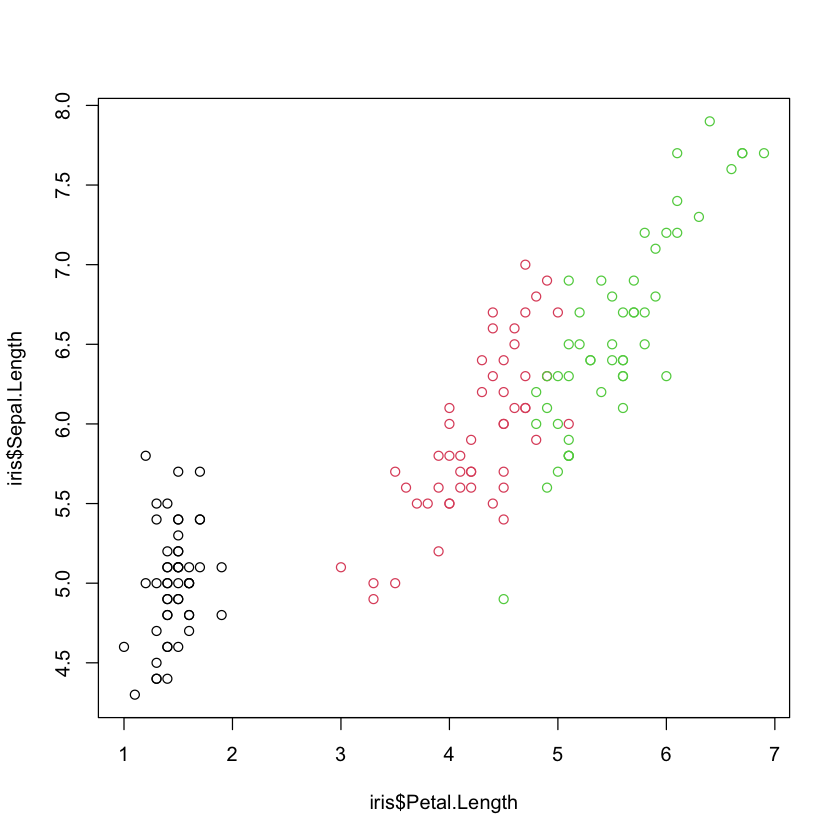

In [10]:
par(bg ='white')
plot(iris$Petal.Length, iris$Sepal.Length ,col= iris$Species)

In [12]:
# Training Data 준비 ( 문제와 답을 분리시켜준다. )
data.training =subset(data.tr, select =-Species) # 문제
head(data.training)
data.training.label = data.tr$Species # 정답



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
28,5.2,3.5,1.5,0.2
16,5.7,4.4,1.5,0.4
22,5.1,3.7,1.5,0.4
37,5.5,3.5,1.3,0.2
44,5.0,3.5,1.6,0.6
9,4.4,2.9,1.4,0.2


In [14]:
# 문제및 정답 만들기. 
x <- subset(data.test, select =-Species)
y <- data.test$Species

# 학습 시키기

In [16]:
# Model 불러오기 (KNN)
library(class) # classification library 가져옴


In [19]:
# k =3 ( Hyper parameter 조정 )
iris_knn <- knn(train =data.training, test = x, cl =data.training.label, k=3)


In [21]:
iris_knn # test 답안지..(예측값 y hat)

# 예측값과 정답값을 비교

mean(y ==iris_knn)


[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor virginica  versicolor
[25] versicolor versicolor versicolor versicolor virginica  versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

[1] 0.9555556

In [22]:
# 뭐가 틀렸을까?? <- 
# 정오표 확인 
table(y, iris_knn)

            iris_knn
y            setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         2
  virginica       0          0        15

In [24]:
# 학습용 검증용 분류 ( target 이 50개 60 개 넘어갈때 일일히 샘플링 안함. )

#install.packages('caret')

In [26]:
library(caret)

In [27]:
set.seed(1234)

samp <- createDataPartition(iris$Species, p =0.7, list =F)# 70 퍼센트 list 안쓸거야..

In [29]:
# 검증용
data.tr <- iris[samp,]
data.test <- iris[-samp,]
nrow(data.tr)
nrow(data.test)

[1] 105

[1] 45

In [33]:
# 문제 및 정답 만들기
x <- subset(data.test, select= -Species)
y <- data.test$Species
nrow(x)
length(y)

[1] 45

[1] 45

In [35]:
install.packages('rpart')


The downloaded binary packages are in
	/var/folders/j9/cyqwg1g57ts8dmlvdn5rdyhw0000gn/T//RtmprZ02WU/downloaded_packages


In [36]:
library(rpart)

In [38]:
# 학습 시키기
iris_tree <- rpart(Species~ ., data = data.tr) # Species 를 제외한  모든 것. .,원래는 Sepal.L + SepalW ..

In [40]:
iris_tree


n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.35 35  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.35 70 35 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.65 38  3 versicolor (0.00000000 0.92105263 0.07894737) *
    7) Petal.Width>=1.65 32  0 virginica (0.00000000 0.00000000 1.00000000) *

In [42]:
# 검증하기
pred <- predict(iris_tree, newdata =x, type = 'class')
pred


1          7         10         11         13         17         18 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        19         23         25         27         33         36         43 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        45         51         54         55         57         61         64 
    setosa versicolor versicolor versicolor versicolor versicolor versicolor 
        70         71         74         77         78         81         83 
versicolor  virginica versicolor versicolor  virginica versicolor versicolor 
        84         94        105        114        115        118        123 
versicolor versicolor  virginica  virginica  virginica  virginica  virginica 
       125        134        138        140        142        143        145 
 virginica versicolor  virginica  virginica  virginica  virginica  virginica 
       148        149        150 
 virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [44]:
mean(pred ==y)

[1] 0.9333333

In [46]:
# 정오표
table(pred, y) # 모델마다 특성이 달라서 틀린부분이 다 다르다. 



            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

In [49]:
### 시각화를 위해 rpart.plot package를 설치
install.packages("rpart.plot")


The downloaded binary packages are in
	/var/folders/j9/cyqwg1g57ts8dmlvdn5rdyhw0000gn/T//RtmprZ02WU/downloaded_packages


In [50]:
library(rpart.plot)

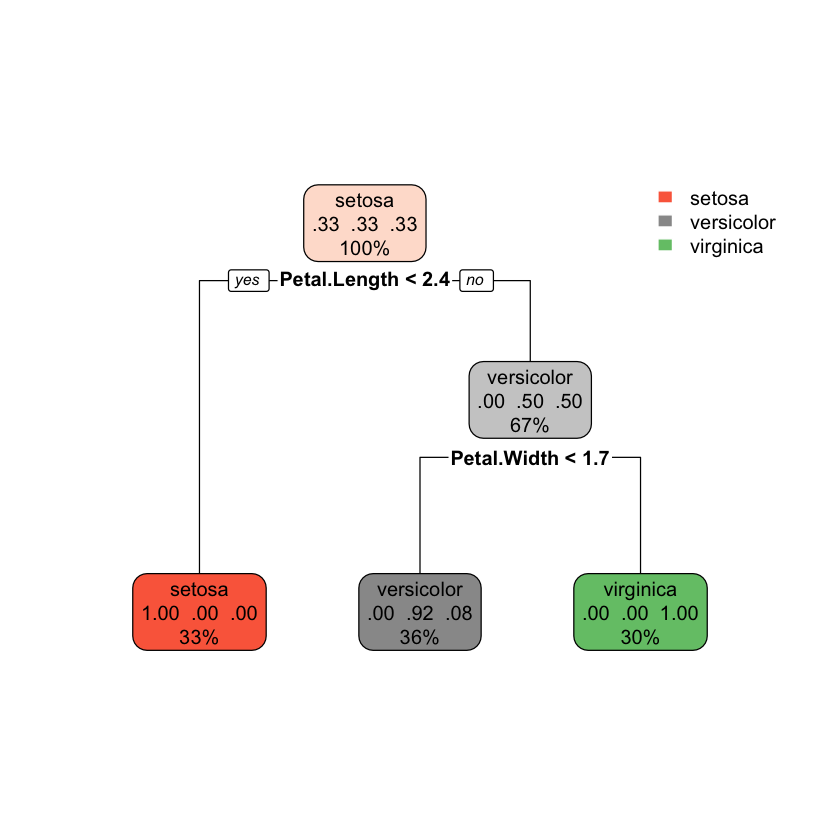

In [51]:
par(bg ='white')
rpart.plot(iris_tree)